In [212]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.use('ggplot')
from pylab import mpl
sns.set(font_scale=1.5)
mpl.rcParams['font.sans-serif'] = ['SimHei']  #解决seaborn中文字体显示问题
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline

In [475]:
lc = pd.read_csv('lychee.csv')

In [476]:
lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 12 columns):
monthSales       1692 non-null int64
originalPrice    1692 non-null float64
praiseContent    1692 non-null object
price            1692 non-null float64
productName      1692 non-null object
productSpuId     1692 non-null int64
productStatus    1692 non-null int64
promotionInfo    476 non-null object
wmPoiId          1692 non-null int64
city             1692 non-null object
province         1692 non-null object
store            1692 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 158.7+ KB


In [477]:
lc.sample(5)

,monthSales,originalPrice,praiseContent,price,productName,productSpuId,productStatus,promotionInfo,wmPoiId,city,province,store
836,10,24.0,赞0,24.00,妃子笑芝芝,853354268,0,NaN,901931429063151,石狮,福建省,小确茶（世茂店）
1634,2,20.0,赞0,20.00,茘枝妃子笑 500g,933294060,0,NaN,856898696919112,西宁,青海省,武富水果店
161,92,11.9,赞0,9.59,妃子笑荔枝1份/约400g,1535652318,0,8.06折,899513362445145,新民,辽宁省,地利生鲜（新民二店）
484,2,20.5,赞0,20.50,【1斤装】A级-妃子笑荔枝（粒果）不少于500g/份,1538472042,0,NaN,1017105272056089,宁波,浙江省,百果园(宁波横河路店)
109,9,11.9,赞0,9.59,妃子笑荔枝1份/约400g,1535572592,0,8.06折,911114069104841,沈阳,辽宁省,地利生鲜（尚品天城店）


### 数据清洗
- 一是把不是荔枝的记录清掉，比如说有些是奶茶店卖的“妃子笑芝芝”；
- 二是统一度量标准，单位比较乱，有以克为单位的，以千克为单位的，还有以斤、半斤为单位的；
- 三是去重、数据类型转换等

#### 1. 清理不是荔枝的记录

In [495]:
lc = lc[-lc['store'].str.contains('茶|奶|咖啡|披萨|冷饮|汁|餐厅|锅|面皮|鱼|饭')]
lc = lc[-lc['productName'].str.contains('茶|奶|咖啡|披萨|冷饮|汁|餐厅|锅|面皮|箱|饮料')]

In [479]:
lc.sample(5)

,monthSales,originalPrice,praiseContent,price,productName,productSpuId,productStatus,promotionInfo,wmPoiId,city,province,store
1647,5,36.8,赞0,28.9,新到新鲜【妃子笑荔枝】一斤装 营养丰富,1537170838,0,7.85折,1084493308912812,银川,宁夏回族自治区,沃爱果水果屋（万达店）
20,30,15.0,赞1,15.0,妃子笑,809424855,0,NaN,943085805683280,遵化,河北省,果然如意水果超市
431,15,28.0,赞0,28.0,妃子笑荔枝,1533778874,0,NaN,852723988730446,丹阳,江苏省,上林果语（御龙湾店）
1339,0,9.9,赞0,6.9,【新品尝鲜】3A级-妃子笑荔枝（粒果）约250g/份,1535723895,0,6.97折,1097219297002750,广州,广东省,叁拾加水果专家（云龙路店）
1690,11,30.0,赞0,30.0,妃子笑荔枝/500g 500g,1531230057,0,NaN,1094045316184658,五家渠,新疆维吾尔自治区,百香果园


#### 2. 统一度量标准

In [480]:
pat_kg = r'([\d|.]*)kg'
pat_g = r'(\d*)g'
pat_jin = r'([\d|.]*)斤'
pat_ke = r'(\d*)克'
def get_weight(data):
    if 'kg' in data:
        return float(re.findall(pattern=pat_kg, string=data)[0])*1000
    elif 'Kg' in data:
        return float(1000)
    elif 'g' in data:
        if re.findall(pattern=pat_g, string=data)[0] != '':
            return float(re.findall(pattern=pat_g, string=data)[0])
    elif '半斤'in data:
        return float(250)
    elif '一斤' in data:
        return float(500)
    elif '每斤' in data:
        return float(500)
    elif '二斤' in data:
        return float(1000)
    elif '三斤' in data:
        return float(1500)
    elif '/斤' in data:
        return float(500)
    elif '斤' in data:
        jin = re.findall(pattern=pat_jin, string=data)
        if len(jin) > 0 and jin[0] != '':
            return float(jin[0])*500
        else:
            return float(500)
    elif '克' in data:
        return float(re.findall(pattern=pat_ke, string=data)[0])
    else:
        return float(500)

In [481]:
lc['gram'] = lc['productName'].apply(get_weight)

In [482]:
lc[['productName', 'gram']].sample(5)

,productName,gram
959,妃子笑荔枝(斤),500.0
172,妃子笑荔枝/500g 500g,500.0
63,海南 妃子笑 一筐净重足6斤,3000.0
1151,妃子笑 荔枝500克 小核,500.0
997,空运妃子笑荔枝 纯甜不涩 一斤,500.0


In [483]:
lc['price_per_jin'] = lc['price'] / (lc['gram']/500)

In [484]:
lc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1397 entries, 0 to 1691
Data columns (total 14 columns):
monthSales       1397 non-null int64
originalPrice    1397 non-null float64
praiseContent    1397 non-null object
price            1397 non-null float64
productName      1397 non-null object
productSpuId     1397 non-null int64
productStatus    1397 non-null int64
promotionInfo    449 non-null object
wmPoiId          1397 non-null int64
city             1397 non-null object
province         1397 non-null object
store            1397 non-null object
gram             1396 non-null float64
price_per_jin    1396 non-null float64
dtypes: float64(4), int64(4), object(6)
memory usage: 163.7+ KB


In [485]:
lc.sample(5)

,monthSales,originalPrice,praiseContent,price,productName,productSpuId,productStatus,promotionInfo,wmPoiId,city,province,store,gram,price_per_jin
108,41,8.8,赞0,8.8,妃子笑荔枝,832505950,0,NaN,1046890870249222,沈阳,辽宁省,王斐水果店,500.0,8.8
207,0,11.0,赞0,11.0,妃子笑荔枝,1137158886,0,NaN,874748581022439,兴城,辽宁省,宝来生鲜超市,500.0,11.0
41,0,20.0,赞0,20.0,妃子笑荔枝,280601915,0,NaN,1112938877299143,高碑店,河北省,果源留香（和平路店）,500.0,20.0
1327,0,159.0,赞0,159.0,【礼盒装】A级-妃子笑荔枝（粒果）\t1盒/不少于3kg,1534597162,0,NaN,938756478650967,广州,广东省,百果园(广州景泰直街店),3000.0,26.5
750,13,13.9,赞0,9.9,A级-妃子笑荔枝（粒果）\t1份/不少于250g,1518373410,0,7.12折,860923081311287,厦门,福建省,百果园(厦门沧虹路店),250.0,19.8


#### 3. 去重、数据类型转换

In [486]:
lc.drop_duplicates(subset='productSpuId', inplace=True)

In [487]:
lc['price_per_jin'].mean()

22.12971348100815

### 问题：
1. 荔枝价格整体情况如何？
2. 哪些城市吃荔枝最贵？
3. 原产地是否有价格优势？
4. 全国荔枝平均价格图
5. 平均工资水平能否实现荔枝自由？

#### 1. 荔枝价格整体情况如何？

In [490]:
lc['price_per_jin'].describe()

count    1395.000000
mean       22.129713
std         9.902365
min         0.010000
25%        15.800000
50%        19.800000
75%        25.800000
max        98.000000
Name: price_per_jin, dtype: float64

Text(0.5,0,'价格/斤')

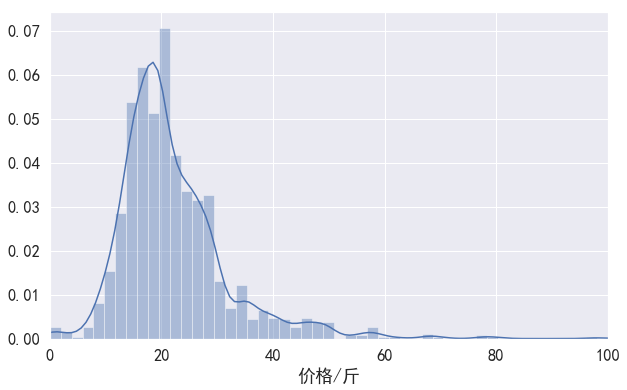

In [491]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(list(lc['price_per_jin'].dropna()), ax=ax)
ax.set_xlim(0, 100)
ax.set_xlabel('价格/斤')

In [492]:
top5_store = lc.loc[lc['price_per_jin'].nlargest().index][['productName', 'price', 'city', 'store']]

In [496]:
def anonymous(data):
    rpc_str = data[1:-1]
    rpc_str_len = len(rpc_str)
    return data.replace(rpc_str, '*'*rpc_str_len)
    

top5_store['store'] = top5_store['store'].apply(anonymous)
top5_store

,productName,price,city,store
1648,海南妃子笑荔枝【500g】,98.0,银川,F******店
249,妃子笑荔枝,80.0,洮南,谷***果
1669,海南妃子笑500g,78.0,上海,绿**********）
1671,海南妃子笑500g,78.0,上海,绿*****园
459,妃子笑荔枝,70.0,兴化,果***你


In [502]:
less_than_3 = lc[(lc['price_per_jin']<3)&(lc['price']>0.1)][['price', 'productName', 'city', 'province', 'store']]
less_than_3['store'] = less_than_3['store'].apply(anonymous)
less_than_3

,price,productName,city,province,store
163,2.00,荔枝 1颗 （妃子笑）,新民,辽宁省,街*********店
1214,0.57,妃子笑荔枝 1粒 尝鲜,长沙,湖南省,果**********）
1242,0.57,妃子笑荔枝 1粒 尝鲜,株洲,湖南省,果**********）
1245,0.57,妃子笑荔枝 1粒 尝鲜,株洲,湖南省,果**********）
1251,0.57,妃子笑荔枝 1粒 尝鲜,湘潭,湖南省,果*********）
1256,0.57,妃子笑荔枝 1粒 尝鲜,湘潭,湖南省,果*********）
1450,2.00,妃子笑荔枝/个,三亚,海南省,亚***市


In [503]:
lc = lc[lc['price_per_jin']>3]

#### 2. 哪些城市吃荔枝最贵？

In [504]:
top10_city = lc.groupby('city')['price_per_jin'].mean().nlargest(10)

In [505]:
from pyecharts import Bar

bar = Bar("荔枝平均价格前10的城市", "单位: 元/斤", width = 600,height=500)
bar.add("", top10_city.index, np.round(top10_city.values, 0), is_stack=True, 
       xaxis_label_textsize=14, yaxis_label_textsize=14, is_label_show=True
       )
bar

#### 3. 原产地是否有价格优势？
国内只要原产地为：广东、福建、海南

In [506]:
small10_city = lc[lc['province'].isin(['广东省', '福建省', '海南省'])].groupby('city')['price_per_jin'].mean().nsmallest(5)

In [509]:
bar = Bar("粤闽琼三省荔枝平均价格最低的城市", "单位: 元/斤", width = 500,height=500)
bar.add("", small10_city.index, np.round(small10_city.values, 1), is_stack=True, 
       xaxis_label_textsize=18, yaxis_label_textsize=14, is_label_show=True
       )
bar

In [508]:
small10_city

city
茂名    10.0
儋州    10.5
宁德    13.0
汕尾    13.8
河源    13.8
Name: price_per_jin, dtype: float64

In [511]:
lc[lc['city'].isin(['广州', '深圳', '厦门'])].groupby('city')['price_per_jin'].mean()

city
厦门    18.452381
广州    18.426316
深圳    18.156944
Name: price_per_jin, dtype: float64

#### 4. 全国荔枝平均价格图

In [276]:
lc_province = lc.groupby('province')['price_per_jin'].mean().reset_index(name='price')

In [279]:
lc_province['province'] = lc_province['province'].str.replace('省|市|自治区|回族自治区|壮族自治区|维吾尔自治区', '')

In [290]:
# 政治上要正确，用平均价格补足西藏和台湾的荔枝价格
lc_province = pd.concat([lc_province, pd.DataFrame({'province':['西藏', '台湾'],
                                                  'price':[22, 22]})])

In [283]:
lc_province['price'].max()

39.8

In [303]:
from pyecharts import Map


map = Map("全国各省份荔枝平均价格图", width=800, height=800)
map.add(
    "",
    lc_province['province'],
    np.round(lc_province['price'], 0),
    maptype="china",
    is_visualmap=True,
    visual_text_color="#000",
    visual_range=[0, 40],
    is_label_show=True
)
map

#### 5. 各省最低工资都能买到多少斤荔枝？

In [304]:
# 数据链接：https://www.phb123.com/city/GDP/28494.html
salary = pd.read_clipboard()

In [306]:
salary = salary[['地区', '标准实行时间', '第一档']]

In [307]:
salary.to_csv('salary.csv')

In [310]:
lc_province = lc_province.merge(salary, left_on='province', right_on='地区')

In [311]:
lc_province['salary_lc'] = np.round(lc_province['第一档']/lc_province['price'], 1)

In [314]:
lc_province['salary_lc'].max()

114.8

In [321]:
lc_province

,price,province,地区,标准实行时间,第一档,salary_lc
0,35.817612,上海,上海,2018.04.01,2420,67.6
1,23.634825,云南,云南,2018.05.01,1670,70.7
2,19.870800,内蒙古,内蒙古,2017.08.01,1760,88.6
3,21.416765,北京,北京,2018.09.01,2120,99.0
4,17.073333,吉林,吉林,2017.10.01,1780,104.3
5,24.567586,四川,四川,2018.07.01,1780,72.5
6,32.135556,天津,天津,2017.07.01,2050,63.8
7,29.023333,宁夏,宁夏,2017.10.01,1660,57.2
8,23.613700,安徽,安徽,2015.11.01,1520,64.4
9,24.235354,山东,山东,2018.06.01,1910,78.8


In [513]:
map = Map("各省最低工资可购买荔枝斤数", width=800, height=800)
map.add(
    "",
    lc_province['province'],
    lc_province['salary_lc'],
    maptype="china",
    is_visualmap=True,
    visual_text_color="#000",
    visual_range=[0, 115],
    is_label_show=True
)
map

### 西瓜自由

In [322]:
wm = pd.read_csv('watermelon.csv')

In [352]:
wm.sample(5)
# 黑美人、麒麟、红玉西瓜、墨童西瓜、冰镇西瓜、8428西瓜、无籽西瓜、山东甜西瓜、本地西瓜

,monthSales,originalPrice,praiseContent,price,productName,productSpuId,productStatus,promotionInfo,wmPoiId,city,province,store
1717,0,10.0,赞0,10.0,西瓜西米露,1519834354,0,NaN,895699431483713,河津,山西省,瑪麗莲甜品
14390,0,33.6,赞0,33.6,牛奶西瓜3斤/份,1522827317,0,NaN,1001265432688205,巴中,四川省,纤果坊（蓝湾国际店）
10361,10,8.0,赞0,8.0,芒果西柚纤果茶,1282960627,0,NaN,1051735593357322,义马,河南省,麦茶德
3156,0,3.5,赞0,3.5,炫迈 水蜜西瓜味无糖口香糖 6片/盒,249595310,0,NaN,1001170943404252,北镇,辽宁省,乐乐购超市
91,0,3.0,赞0,3.0,中国 益达 益达西瓜味木糖醇,1335450692,0,NaN,1108751284220567,秦皇岛,河北省,德隆超市


### 数据处理
- 一是把不是西瓜的记录清掉；
- 二是统一度量标准，单位比较乱，有以克为单位的，以千克为单位的，还有以斤、半斤为单位的；
- 三是去重、数据类型转换等

#### 1. 清理不是西瓜的记录

In [457]:
wm  = wm[wm['productName'].str.contains('黑美人|麒麟|红玉|墨童|冰镇西瓜|8428|无籽西瓜|山东甜西瓜|本地西瓜')]
wm  = wm[-wm['productName'].str.contains('汽水|切|净|盒')]

#### 2. 统一度量标准

In [423]:
def get_weight_wm(data):
    if 'kg' in data:
        kg = re.findall(pattern=pat_kg, string=data)
        if len(kg) >0 and kg[0] != '':
            return float(kg[0])*1000
    elif 'Kg' in data:
        return float(1000)
    elif 'g' in data:
        if re.findall(pattern=pat_g, string=data)[0] != '':
            return float(re.findall(pattern=pat_g, string=data)[0])
    elif '半斤'in data:
        return float(250)
    elif '一斤' in data:
        return float(500)
    elif '每斤' in data:
        return float(500)
    elif '十二斤' in data:
        return float(6000)
    elif '二斤' in data:
        return float(1000)
    elif '三斤半' in data:
        return float(1750)
    elif '三斤' in data:
        return float(1500)
    elif '四斤' in data:
        return float(2000)
    elif '五斤' in data:
        return float(2500)
    elif '六斤半' in data:
        return float(3250)
    elif '六斤' in data:
        return float(3000)
    elif '七斤' in data:
        return float(3500)
    elif '八斤' in data:
        return float(4000)
    elif '九斤' in data:
        return float(4500)
    elif '十斤' in data:
        return float(5000)    
    elif '/斤' in data:
        return float(500)
    elif '斤' in data:
        jin = re.findall(pattern=pat_jin, string=data)
        if len(jin) > 0 and jin[0] != '':
            return float(jin[0])*500
        else:
            return float(500)
    elif '克' in data:
        ke = re.findall(pattern=pat_ke, string=data)
        if len(ke) > 0 and ke[0] != '':
            return float(ke[0])
    elif '/个' in data:
        return float(5000)
    elif '半个' in data:
        return float(2500)
    elif '个' in data:
        return float(5000)
    else:
        return np.nan

In [424]:
wm['gram'] = wm['productName'].apply(get_weight_wm)

In [425]:
wm[['productName', 'gram', 'price']].sample(5)

,productName,gram,price
2687,黑美人西瓜 500g,500.0,99.0
9349,红玉西瓜一个 一个四五斤,2500.0,24.8
5995,8424麒麟瓜（整个）,5000.0,48.0
8112,8424麒麟西瓜一个,5000.0,29.0
4340,麒麟西瓜/半（5斤左右）,2500.0,40.0


In [410]:
wm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2296 entries, 1 to 17689
Data columns (total 13 columns):
monthSales       2296 non-null int64
originalPrice    2296 non-null float64
praiseContent    2296 non-null object
price            2296 non-null float64
productName      2296 non-null object
productSpuId     2296 non-null int64
productStatus    2296 non-null int64
promotionInfo    302 non-null object
wmPoiId          2296 non-null int64
city             2296 non-null object
province         2296 non-null object
store            2296 non-null object
gram             1400 non-null float64
dtypes: float64(3), int64(4), object(6)
memory usage: 251.1+ KB


In [412]:
wm = wm[wm['gram'].notnull()]

In [417]:
wm['price_per_jin'] = wm['price'] / (wm['gram']/500)

#### 1. 西瓜价格整体情况如何？

In [420]:
wm

,monthSales,originalPrice,praiseContent,price,productName,productSpuId,productStatus,promotionInfo,wmPoiId,city,province,store,gram,price_per_jin
1,109,18.80,赞1,14.99,鲜切 冰镇西瓜600g盒,1355049761,0,7.97折,1007879682323888,石家庄,河北省,泰芒鲜果店,600.0,12.491667
2,338,7.90,赞2,7.68,鲜切 冰镇西瓜400g （特甜）,742138531,0,9.72折,1007879682323888,石家庄,河北省,泰芒鲜果店,400.0,9.600000
3,116,2.00,赞0,1.00,为我点亮右上角小星星哦 迷你冰镇西瓜切150g,1522088273,0,5.0折,1007879682323888,石家庄,河北省,泰芒鲜果店,150.0,3.333333
37,0,65.80,赞0,65.80,麒麟西瓜 /个,1269632110,0,NaN,1024690184314426,唐山,河北省,乐家超市,5000.0,6.580000
162,11,29.50,赞0,29.50,黑美人西瓜 进口越南西部 个,1313114869,0,NaN,943468057787314,承德,河北省,海峰水果蔬菜超市,5000.0,2.950000
163,3,37.99,赞0,37.99,麒麟西瓜 半个,1298678405,0,NaN,943468057787314,承德,河北省,海峰水果蔬菜超市,2500.0,7.598000
165,0,39.90,赞0,39.90,早春红玉西瓜 皮薄 口感甘甜 个,1532341783,0,NaN,943468057787314,承德,河北省,海峰水果蔬菜超市,5000.0,3.990000
167,0,68.00,赞0,68.00,2484冰糖麒麟西瓜 5kg,1328735166,0,NaN,960420293659451,承德,河北省,丁丁果儿（卓越家园店）,5000.0,6.800000
172,0,48.80,赞0,48.80,海南 又脆又甜的海南恒利达麒麟西瓜每个,456171931,0,NaN,906131907052284,沧州,河北省,增起烟酒绿风枣行,5000.0,4.880000
182,0,45.00,赞0,45.00,黑美人西瓜 个,1248392000,0,NaN,960759596114219,沧州,河北省,好再来超市,5000.0,4.500000


In [463]:
wm[['price_per_jin', 'productName', 'price', 'gram']].sample(5)

,price_per_jin,productName,price,gram
11704,6.388350,【整个】麒麟瓜约 9.8-10.3斤/份,65.80,5150.0
16616,3.200000,海南麒麟 西瓜 1个/份,32.00,5000.0
4323,6.998000,麒麟西瓜嘎嘎甜一个,69.98,5000.0
428,6.971429,特价麒麟西瓜 6-7斤/1个,48.80,3500.0
9646,8.166667,【1/4个】A级-麒麟瓜（大）1/4个/带皮不少于1.5kg,24.50,1500.0


In [449]:
wm = wm[wm['price_per_jin']<20]

In [514]:
wm['price_per_jin'].describe()

count    837.000000
mean       6.345770
std        2.977894
min        0.016667
25%        4.444444
50%        6.000000
75%        7.718182
max       19.980000
Name: price_per_jin, dtype: float64

Text(0.5,0,'价格/斤')

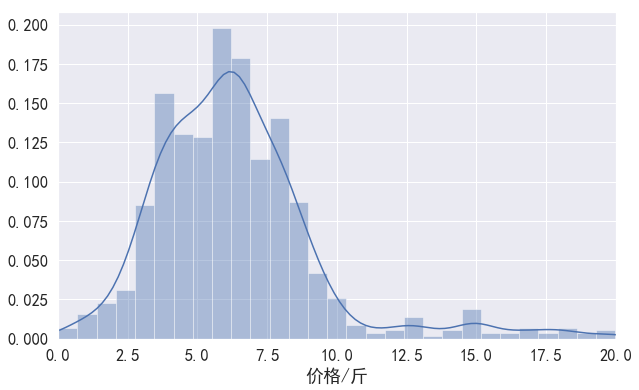

In [464]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(list(wm['price_per_jin'].dropna()), ax=ax)
ax.set_xlim(0, 20)
ax.set_xlabel('价格/斤')

#### 2. 全国西瓜平均价格图

In [467]:
wm_province = wm.groupby('province')['price_per_jin'].mean().reset_index(name='price')

In [469]:
wm_province['province'] = wm_province['province'].str.replace('省|市|自治区|回族自治区|壮族自治区|维吾尔自治区', '')

In [470]:
wm_province['price'].max()

9.385535714285714

In [515]:
map = Map("全国各省份西瓜平均价格图", width=800, height=800)
map.add(
    "",
    wm_province['province'],
    np.round(wm_province['price'], 1),
    maptype="china",
    is_visualmap=True,
    visual_text_color="#000",
    visual_range=[0, 10],
    is_label_show=True
)
map